In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import trustworthiness
import Template

Template = Template.Template()

# import the data from all sheets of the Excel file

df0 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=0)
df1 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=1)
df2 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=2)
df3 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=3)

# Concatenate all sheets into a single DataFrame
df = pd.concat([df0, df1, df2, df3], ignore_index=True)

# Concatenate specific dataframes for analysis
df_Not0 = pd.concat([df1, df2, df3], ignore_index=True)

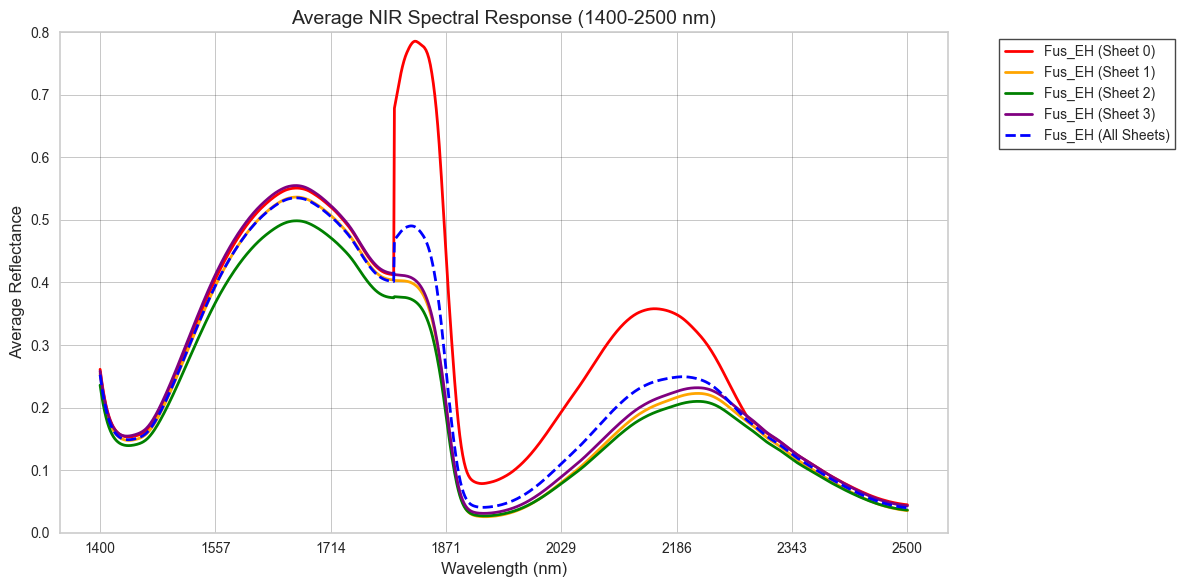

In [3]:
# Create a single figure for all plant indices
plt.figure(figsize=(12, 6))

# Filter wavelengths between 1400 and 2500
wavelengths = [int(col) for col in df.columns if str(col).isdigit() and 1400 <= int(col) <= 2500]

fus_df_0 = df0[df0['Tratamiento'] == 'Fus_EH'][wavelengths].mean()
plt.plot(wavelengths, fus_df_0, label='Fus_EH (Sheet 0)', color='red')

fus_df_1 = df1[df1['Tratamiento'] == 'Fus_EH'][wavelengths].mean()
plt.plot(wavelengths, fus_df_1, label='Fus_EH (Sheet 1)', color='orange')

fus_df_2 = df2[df2['Tratamiento'] == 'Fus_EH'][wavelengths].mean()
plt.plot(wavelengths, fus_df_2, label='Fus_EH (Sheet 2)', color='green')

fus_df_3 = df3[df3['Tratamiento'] == 'Fus_EH'][wavelengths].mean()
plt.plot(wavelengths, fus_df_3, label='Fus_EH (Sheet 3)', color='purple')


fus_df = df[df['Tratamiento'] == 'Fus_EH'][wavelengths]
plt.plot(wavelengths, fus_df.mean(), label='Fus_EH (All Sheets)', color='blue', linewidth=2, linestyle='--')



# Customize plot
plt.xlabel('Wavelength (nm)')
plt.ylabel('Average Reflectance')
plt.title('Average NIR Spectral Response (1400-2500 nm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 8))

# Set y-axis limits to zoom in on the differences
plt.ylim(0, 0.8) 

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

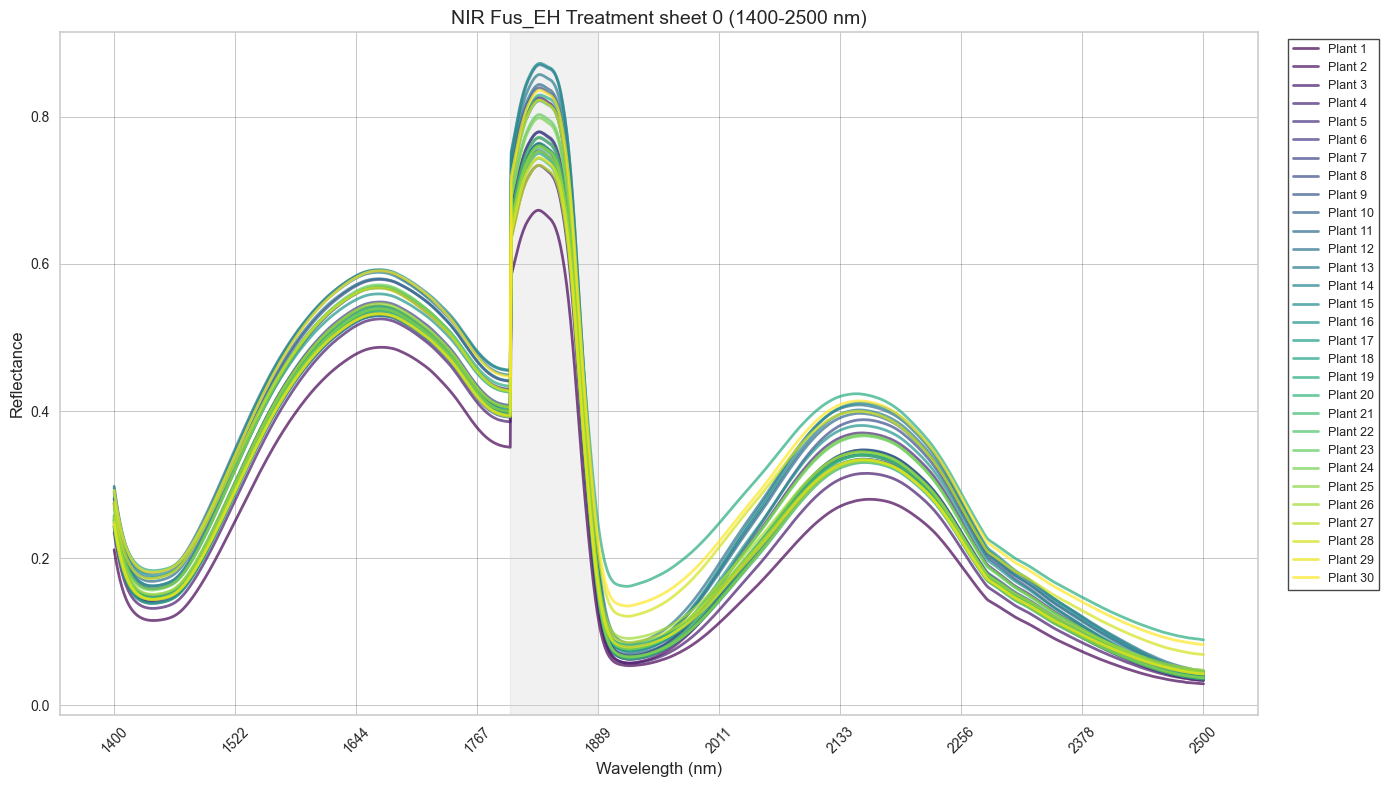

In [4]:
# Set up a larger figure with a good aspect ratio
plt.figure(figsize=(14, 8))

# Get all unique plant values in Fus_EH treatment from df0
fus_plants = df0[df0['Tratamiento'] == 'Fus_EH']['Planta'].unique()

# Create a colormap that will visually distinguish plants
colors = plt.cm.viridis(np.linspace(0, 1, len(fus_plants)))

# Plot each plant's spectral signature
for i, plant in enumerate(fus_plants):
    plant_data = df0[(df0['Tratamiento'] == 'Fus_EH') & (df0['Planta'] == plant)][wavelengths]
    
    if not plant_data.empty:
        plt.plot(wavelengths, plant_data.values[0], 
                 color=colors[i], 
                 label=f'Plant {plant}',
                 alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('NIR Fus_EH Treatment sheet 0 (1400-2500 nm)', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis with evenly spaced ticks
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 10), rotation=45)

# Create a more user-friendly legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

# Highlight regions of interest 
plt.axvspan(1800, 1889, color='lightgray', alpha=0.3)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

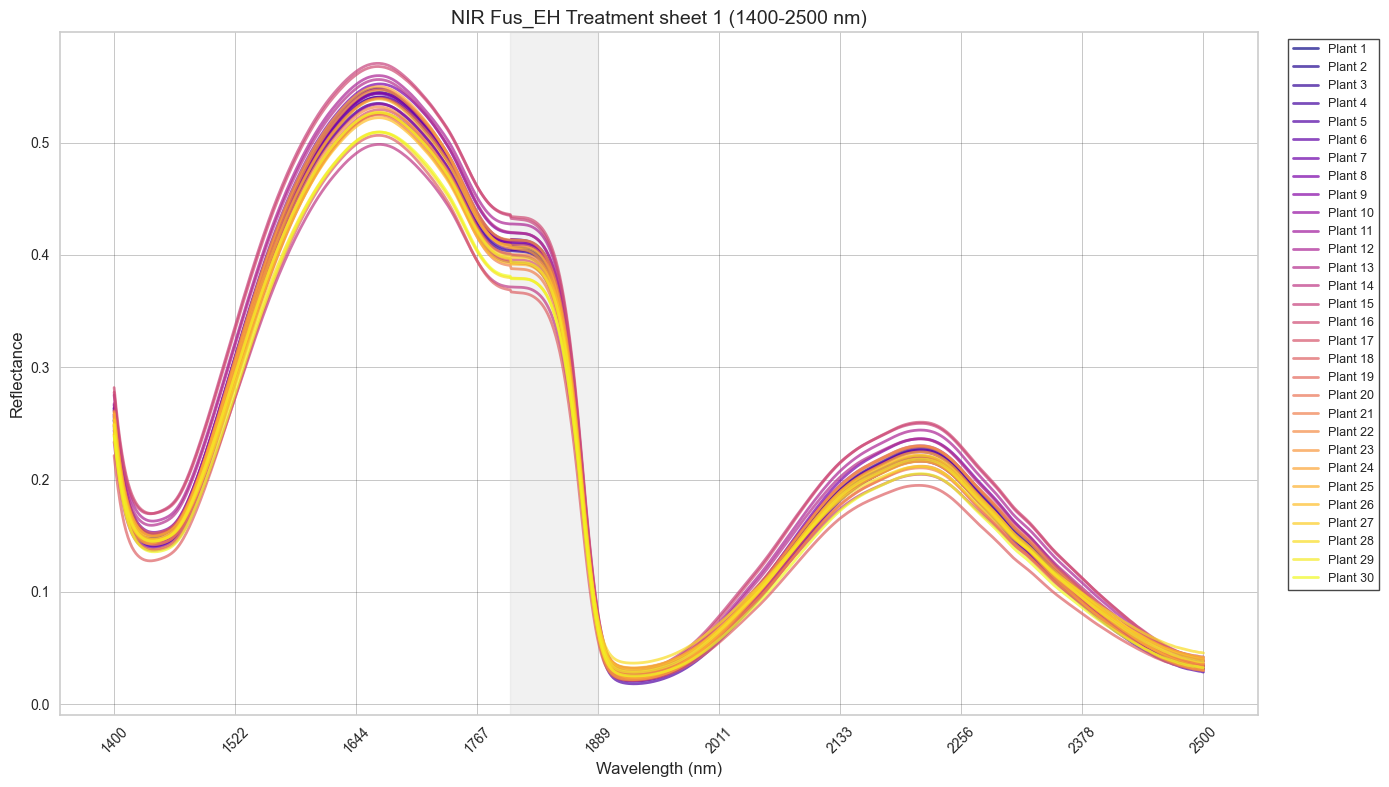

In [5]:
# Set up a larger figure with a good aspect ratio
plt.figure(figsize=(14, 8))

# Get all unique plant values in Fus_EH treatment from df1
fus_plants = df1[df1['Tratamiento'] == 'Fus_EH']['Planta'].unique()

# Create a colormap that will visually distinguish plants
colors = plt.cm.plasma(np.linspace(0, 1, len(fus_plants)))


# Plot each plant's spectral signature
for i, plant in enumerate(fus_plants):
    plant_data = df1[(df1['Tratamiento'] == 'Fus_EH') & (df1['Planta'] == plant)][wavelengths]
    
    if not plant_data.empty:
        plt.plot(wavelengths, plant_data.values[0], 
                 color=colors[i], 
                 label=f'Plant {plant}',
                 alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('NIR Fus_EH Treatment sheet 1 (1400-2500 nm)', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis with evenly spaced ticks
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 10), rotation=45)

# Create a more user-friendly legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

# Highlight regions of interest 
plt.axvspan(1800, 1889, color='lightgray', alpha=0.3)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

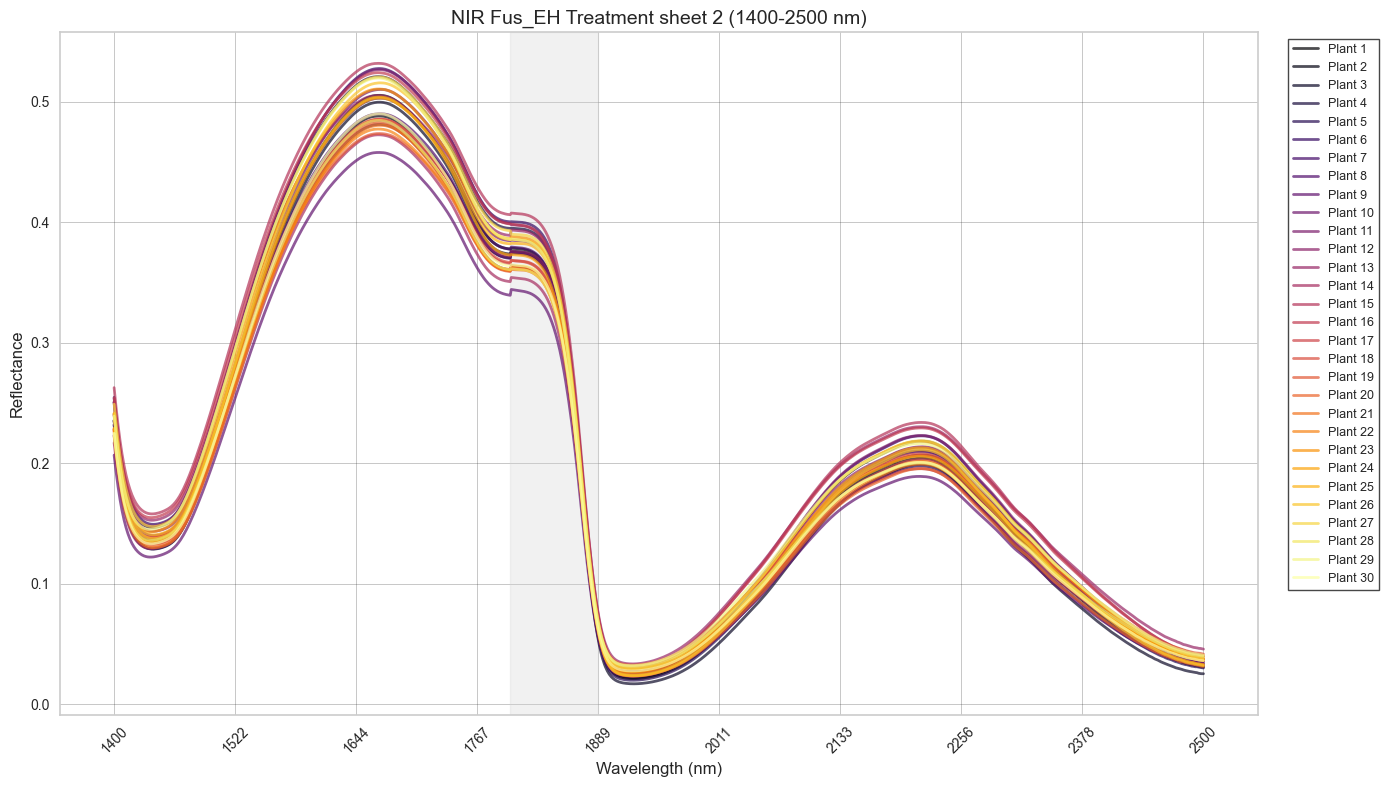

In [6]:
# Set up a larger figure with a good aspect ratio
plt.figure(figsize=(14, 8))

# Get all unique plant values in Fus_EH treatment from df2
fus_plants = df2[df2['Tratamiento'] == 'Fus_EH']['Planta'].unique()

# Create a colormap that will visually distinguish plants
colors = plt.cm.inferno(np.linspace(0, 1, len(fus_plants)))

# Plot each plant's spectral signature
for i, plant in enumerate(fus_plants):
    plant_data = df2[(df2['Tratamiento'] == 'Fus_EH') & (df2['Planta'] == plant)][wavelengths]
    
    if not plant_data.empty:
        plt.plot(wavelengths, plant_data.values[0], 
                 color=colors[i], 
                 label=f'Plant {plant}',
                 alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('NIR Fus_EH Treatment sheet 2 (1400-2500 nm)', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis with evenly spaced ticks
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 10), rotation=45)

# Create a more user-friendly legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

# Highlight regions of interest 
plt.axvspan(1800, 1889, color='lightgray', alpha=0.3)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

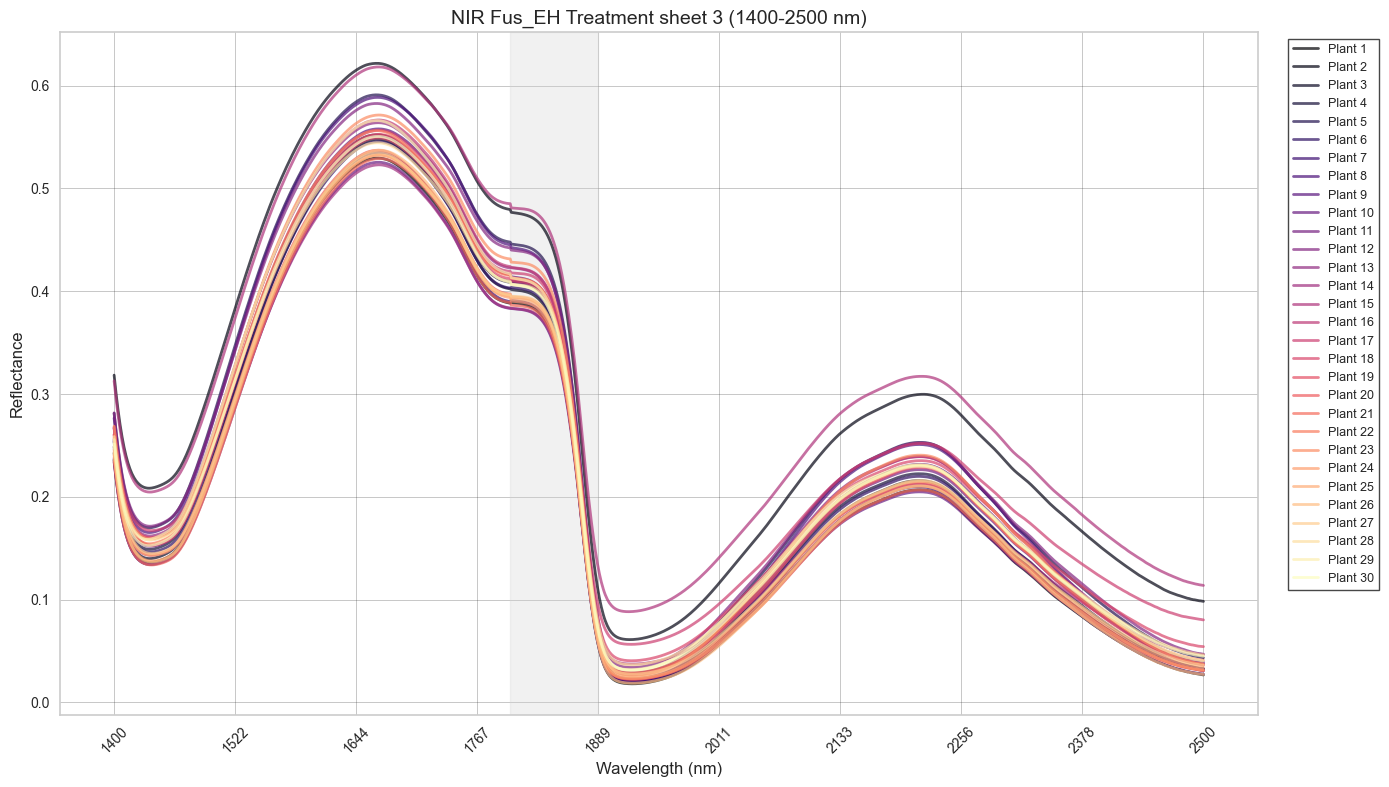

In [7]:
# Set up a larger figure with a good aspect ratio
plt.figure(figsize=(14, 8))

# Get all unique plant values in Fus_EH treatment from df3
fus_plants = df3[df3['Tratamiento'] == 'Fus_EH']['Planta'].unique()

# Create a colormap that will visually distinguish plants
colors = plt.cm.magma(np.linspace(0, 1, len(fus_plants)))

# Plot each plant's spectral signature
for i, plant in enumerate(fus_plants):
    plant_data = df3[(df3['Tratamiento'] == 'Fus_EH') & (df3['Planta'] == plant)][wavelengths]
    
    if not plant_data.empty:
        plt.plot(wavelengths, plant_data.values[0], 
                 color=colors[i], 
                 label=f'Plant {plant}',
                 alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('NIR Fus_EH Treatment sheet 3 (1400-2500 nm)', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis with evenly spaced ticks
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 10), rotation=45)

# Create a more user-friendly legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

# Highlight regions of interest 
plt.axvspan(1800, 1889, color='lightgray', alpha=0.3)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

## PCA and t-SNE without df0 (sheet 0)

### PCA

Explained variance by PC1: 67.33%
Explained variance by PC2: 25.08%
Total explained variance: 92.41%


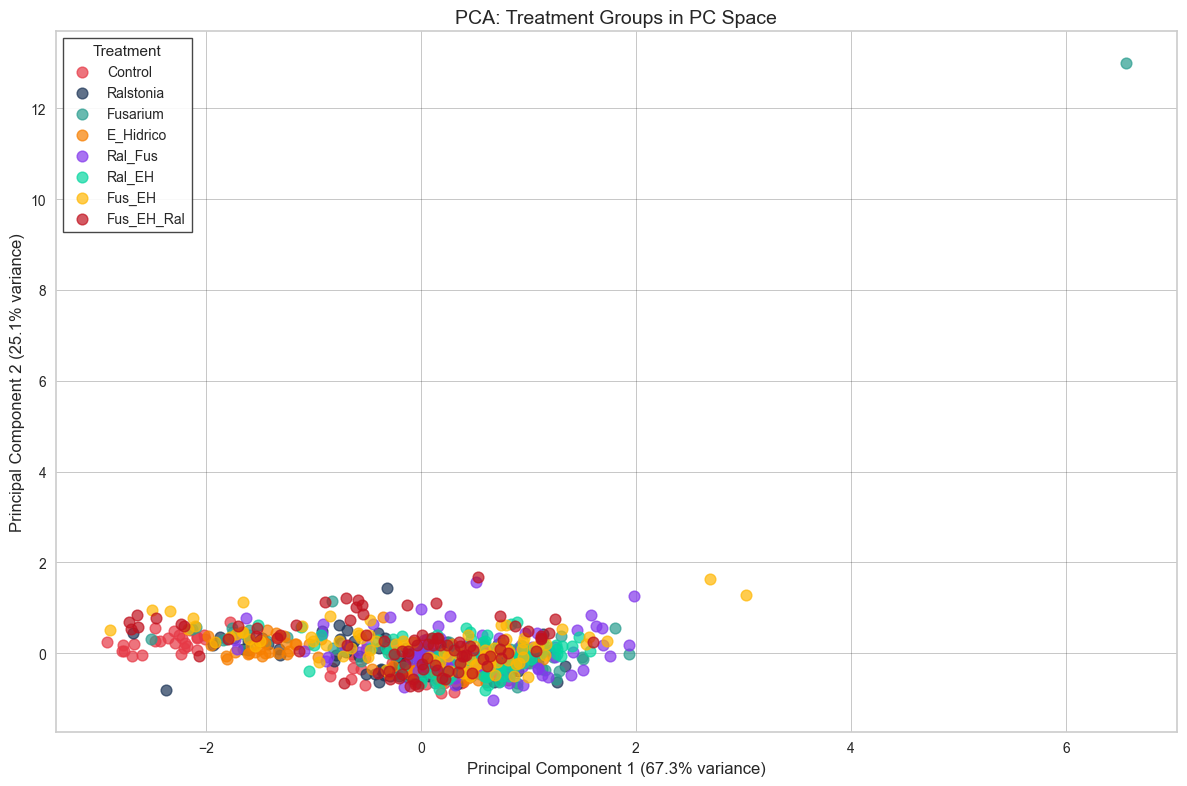

In [10]:
pca = PCA(n_components=2)

# The wavelength columns are from index 3 to the end
wavelength_data = df_Not0.iloc[:, 3:]

# Fit AND transform the data
pca_components = pca.fit_transform(wavelength_data)

# Check explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2%}")
print(f"Explained variance by PC2: {explained_variance[1]:.2%}")
print(f"Total explained variance: {explained_variance.sum():.2%}")

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(
    data=pca_components,
    columns=['PC1', 'PC2']
)

# Add categorical columns for plotting
pca_df['Tratamiento'] = df_Not0['Tratamiento'].values
pca_df['Planta'] = df_Not0['Planta'].values

# Reorder columns to put Tratamiento and Planta first
pca_df = pca_df[['Tratamiento', 'Planta', 'PC1', 'PC2']]

# Direct PCA visualization approach (without using template)
plt.figure(figsize=(12, 8))

# Plot each treatment as a separate group
for treatment in pca_df['Tratamiento'].unique():
    subset = pca_df[pca_df['Tratamiento'] == treatment]
    plt.scatter(subset['PC1'], subset['PC2'], 
                label=treatment, alpha=0.7, s=60)

# Add proper labels that reflect PCA meaning
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.1%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.1%} variance)')
plt.title('PCA: Treatment Groups in PC Space')
plt.legend(title='Treatment')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Explained variance by PC1: 67.33%
Explained variance by PC2: 25.08%
Explained variance by PC3: 4.04%
Total explained variance: 96.45%


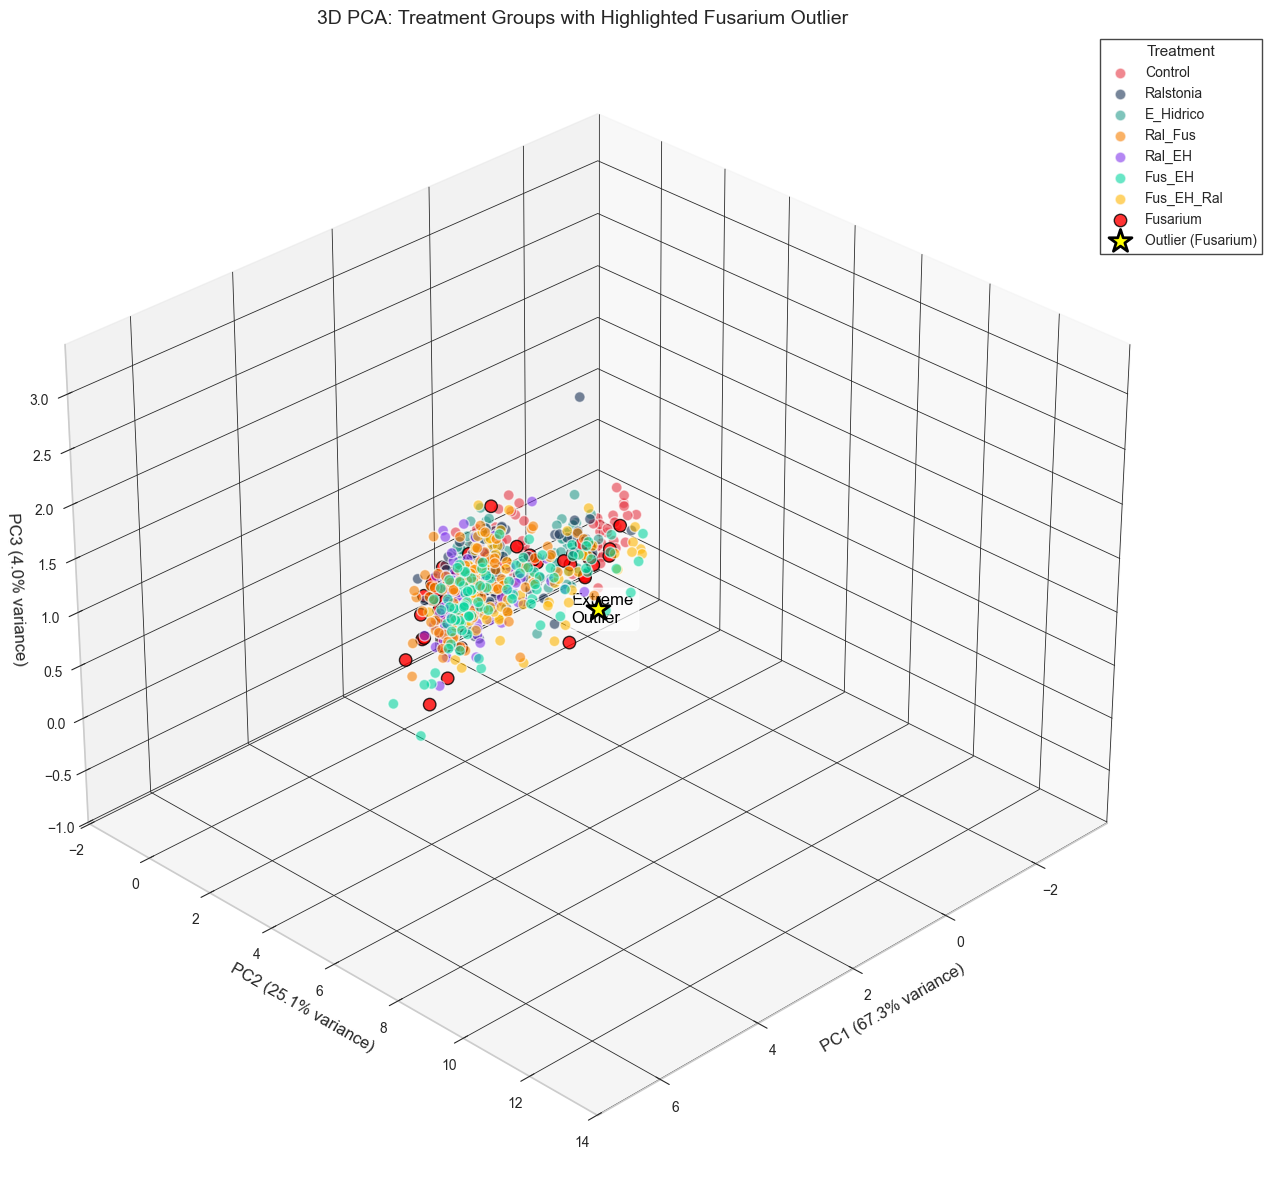

In [ ]:
pca = PCA(n_components=3)

# The wavelength columns are from index 3 to the end
wavelength_data = df_Not0.iloc[:, 3:]

# Fit AND transform the data
pca_components_3d = pca.fit_transform(wavelength_data)

# Check explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2%}")
print(f"Explained variance by PC2: {explained_variance[1]:.2%}")
print(f"Explained variance by PC3: {explained_variance[2]:.2%}")
print(f"Total explained variance: {explained_variance.sum():.2%}")

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(
    data=pca_components_3d,
    columns=['PC1', 'PC2', 'PC3']
)

# Add categorical columns for plotting
pca_df['Tratamiento'] = df_Not0['Tratamiento'].values
pca_df['Planta'] = df_Not0['Planta'].values

# Reorder columns to put Tratamiento and Planta first
pca_df = pca_df[['Tratamiento', 'Planta', 'PC1', 'PC2', 'PC3']]


# Create the figure and 3D axes
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Get unique treatments for color mapping
treatments = pca_df['Tratamiento'].unique()

# First plot all non-Fusarium treatments
for treatment in treatments:
    if 'Fusarium' not in treatment:
        subset = pca_df[pca_df['Tratamiento'] == treatment]
        ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
                  label=treatment, alpha=0.6, s=60, edgecolor='w')

    if 'Fusarium' in treatment:
        subset = pca_df[pca_df['Tratamiento'] == treatment]
        
        # Find the outlier point (assuming it's the one with largest PC1 value)
        outlier_idx = subset['PC1'].idxmax()
        non_outliers = subset.drop(outlier_idx)
        outlier = subset.loc[outlier_idx]
        
        # Plot regular Fusarium points with distinct color
        ax.scatter(non_outliers['PC1'], non_outliers['PC2'], non_outliers['PC3'],
                  label=treatment, color='#FF0000', alpha=0.8, s=80, edgecolor='k')
        
        # Plot outlier with special marker and size
        ax.scatter(outlier['PC1'], outlier['PC2'], outlier['PC3'],
                  marker='*', color='yellow', s=300, edgecolor='black', linewidth=2,
                  label=f'Outlier ({treatment})')

# Set axis labels with explained variance
ax.set_xlabel(f'PC1 ({explained_variance[0]:.1%} variance)', fontsize=12)
ax.set_ylabel(f'PC2 ({explained_variance[1]:.1%} variance)', fontsize=12)
ax.set_zlabel(f'PC3 ({explained_variance[2]:.1%} variance)', fontsize=12)

# Set title and legend
ax.set_title('3D PCA: Treatment Groups with Highlighted Fusarium Outlier', fontsize=14)
ax.legend(title='Treatment', loc='upper right', bbox_to_anchor=(1.1, 1))

# Add an annotation pointing to the outlier
ax.text(outlier['PC1']+0.5, outlier['PC2'], outlier['PC3'], 
        "Extreme\nOutlier", fontsize=12, color='black',
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

# Improve perspective
ax.view_init(elev=30, azim=45)
ax.dist = 12

# Add grid for better depth perception
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### T-SNE 

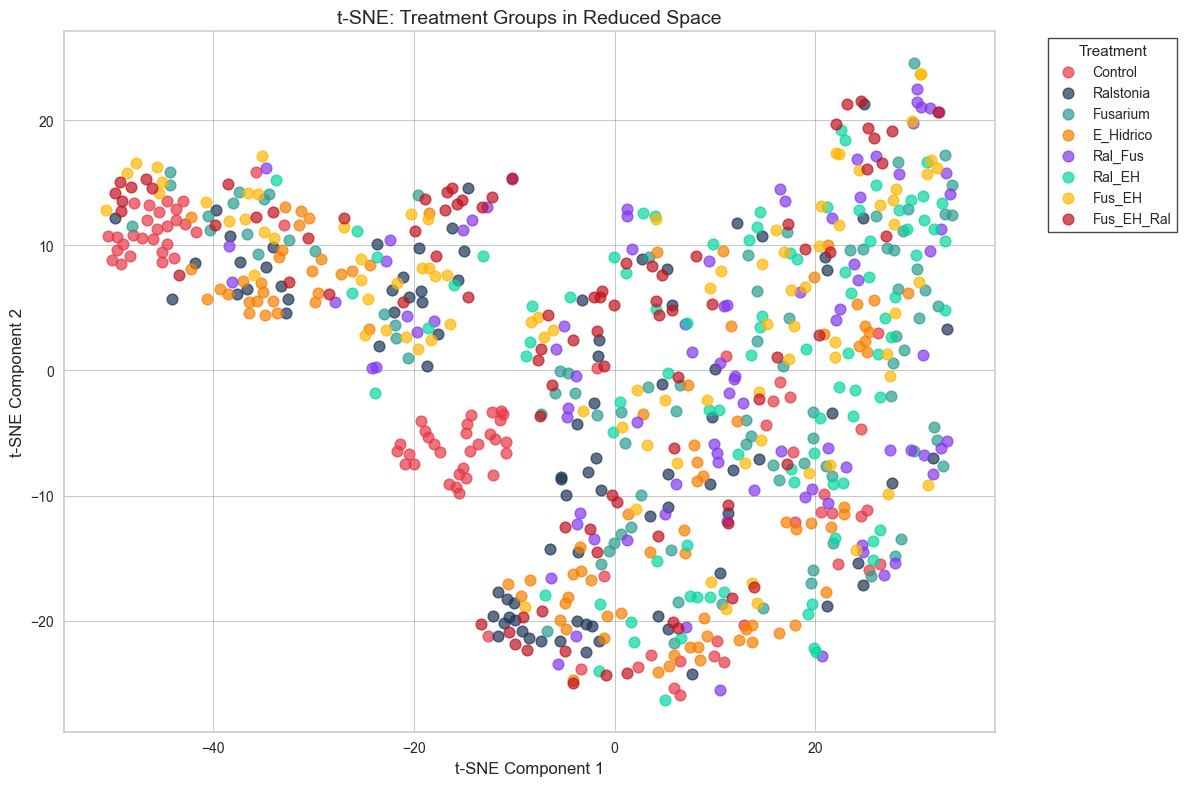

In [13]:
# The wavelength columns are from index 3 to the end
wavelength_data = df_Not0.iloc[:, 3:]

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(wavelength_data)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(
    data=tsne_results,
    columns=['t-SNE1', 't-SNE2']
)

# Add categorical columns for plotting
tsne_df['Tratamiento'] = df_Not0['Tratamiento'].values
tsne_df['Planta'] = df_Not0['Planta'].values

# Plot t-SNE results
plt.figure(figsize=(12, 8))

# Plot each treatment as a separate group
for treatment in tsne_df['Tratamiento'].unique():
    subset = tsne_df[tsne_df['Tratamiento'] == treatment]
    plt.scatter(subset['t-SNE1'], subset['t-SNE2'], 
                label=treatment, alpha=0.7, s=60)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE: Treatment Groups in Reduced Space')
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

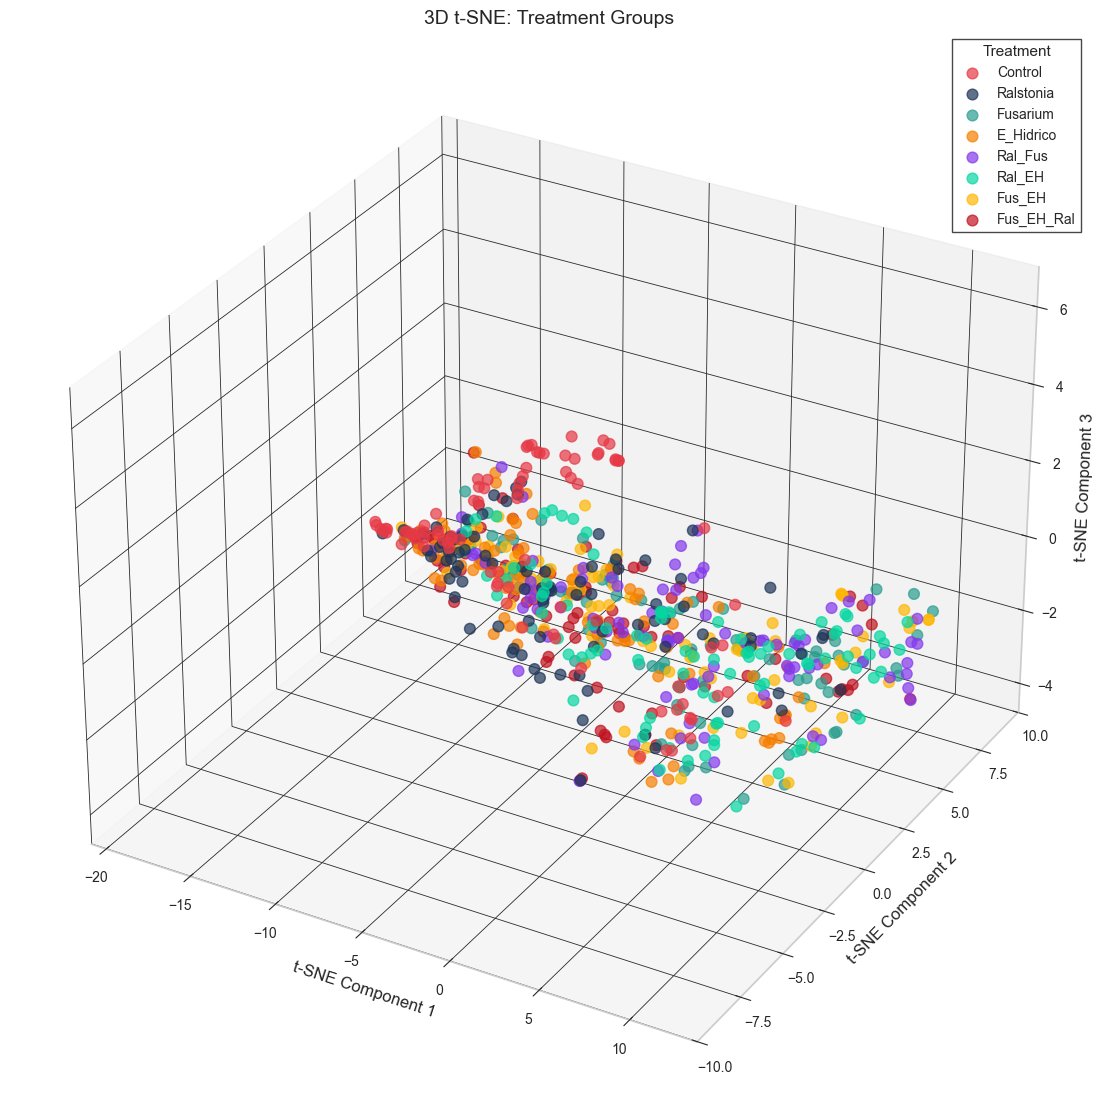

In [17]:
# Create the t-SNE model and transform the data
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
tsne_results_3d = tsne_3d.fit_transform(wavelength_data)

tsne_df = pd.DataFrame(
    tsne_results_3d, 
    columns=['Component 1', 'Component 2', 'Component 3']
)

tsne_df['Tratamiento'] = df_Not0['Tratamiento'].values 

# Create 3D plot
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')

# 3. Now, loop and plot using the new, clean 'tsne_df'
for treatment in tsne_df['Tratamiento'].unique():
    # Filter the new DataFrame
    subset = tsne_df[tsne_df['Tratamiento'] == treatment] 
    
    # Plot using the named columns
    ax.scatter(subset['Component 1'], subset['Component 2'], subset['Component 3'], 
               label=treatment, alpha=0.7, s=60)

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D t-SNE: Treatment Groups')
ax.legend(title='Treatment')
plt.show()